In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-09-06-21_48_08/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

35001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

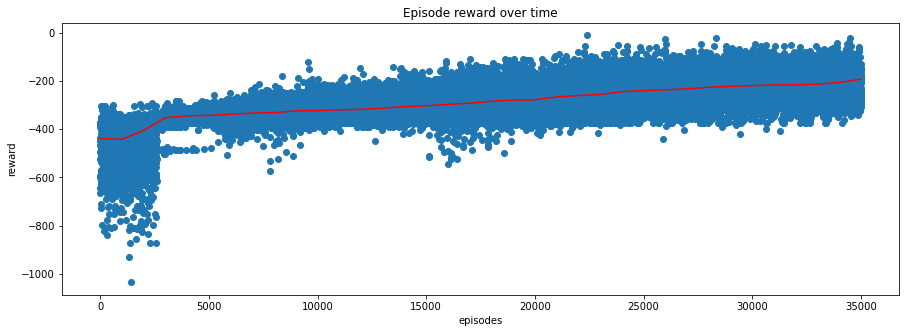

Maximum: -11.0
Average: -292.01946230105983
Moving Average (simple): {0: -438.96123876123875, 1000: -441.74725274725273, 2000: -405.0215784215784, 3000: -352.45994005994004, 4000: -344.34805194805193, 5000: -343.05094905094904, 6000: -337.8343656343656, 7000: -333.30829170829173, 8000: -331.3962037962038, 9000: -323.98101898101896, 10000: -322.8865134865135, 11000: -319.6051948051948, 12000: -317.83896103896103, 13000: -312.818981018981, 14000: -306.2095904095904, 15000: -302.67452547452547, 16000: -297.1132867132867, 17000: -292.1972027972028, 18000: -284.2837162837163, 19000: -279.1068931068931, 20000: -278.0867132867133, 21000: -266.3132867132867, 22000: -260.5136863136863, 23000: -255.67452547452547, 24000: -244.63856143856145, 25000: -239.5122877122877, 26000: -236.63596403596404, 27000: -232.74085914085913, 28000: -226.0115884115884, 29000: -222.36023976023975, 30000: -219.37222777222777, 31000: -216.56703296703296, 32000: -216.14765234765235, 33000: -213.06393606393607, 34000: -

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

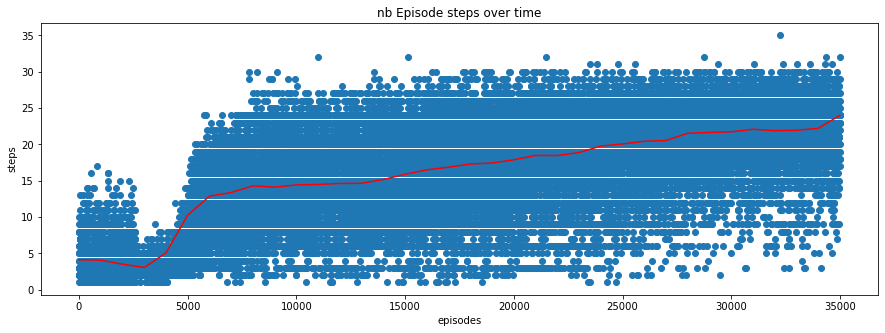

Maximum: 35
Average: 15.700437130367703
Moving Average (simple): {0: 4.124875124875125, 1000: 4.060939060939061, 2000: 3.5094905094905093, 3000: 3.057942057942058, 4000: 5.072927072927073, 5000: 10.257742257742258, 6000: 12.869130869130869, 7000: 13.376623376623376, 8000: 14.290709290709291, 9000: 14.113886113886114, 10000: 14.415584415584416, 11000: 14.480519480519481, 12000: 14.621378621378621, 13000: 14.640359640359641, 14000: 15.168831168831169, 15000: 15.884115884115884, 16000: 16.492507492507492, 17000: 16.859140859140858, 18000: 17.293706293706293, 19000: 17.43056943056943, 20000: 17.874125874125873, 21000: 18.477522477522477, 22000: 18.464535464535466, 23000: 18.876123876123877, 24000: 19.76023976023976, 25000: 20.062937062937063, 26000: 20.41958041958042, 27000: 20.532467532467532, 28000: 21.526473526473527, 29000: 21.645354645354644, 30000: 21.727272727272727, 31000: 22.07892107892108, 32000: 21.893106893106893, 33000: 21.93806193806194, 34000: 22.204795204795204, 35000: 24}


In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
# plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")